In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed = 1

### 1. Create dummy data

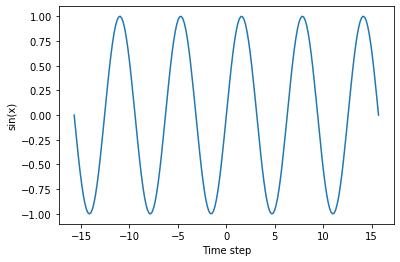

In [2]:
x = np.linspace(-np.pi*5, np.pi*5, 200)
y = np.sin(np.linspace(-np.pi*5, np.pi*5, 200))

plt.plot(x, y)
plt.xlabel('Time step')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

### 2. Add anomalies

Creating anomaly between points:  165  and  175


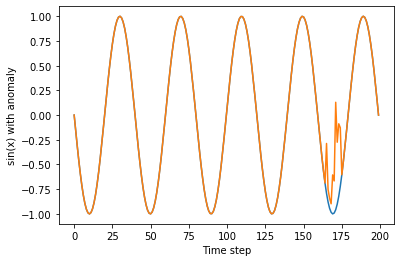

In [3]:
anomaly_size = 10

anomaly = np.abs(np.random.normal(size=anomaly_size) * 0.5)
interval_start = np.random.randint(high=190, low=100)

anomalized_y = y.copy()

print("Creating anomaly between points: ", interval_start , " and ", interval_start + anomaly_size)
for i in range(interval_start, interval_start+len(anomaly)):
    anomalized_y[i] += anomaly[i-interval_start]

plt.plot(y)
plt.plot(anomalized_y)
plt.xlabel('Time step')
plt.ylabel('sin(x) with anomaly')
plt.axis('tight')
plt.show() 

### 3. Simple predictor

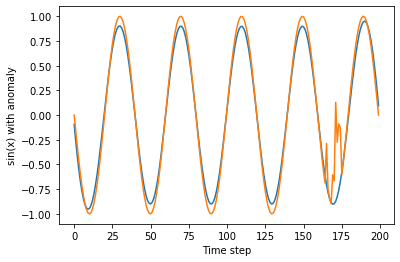

In [4]:
from sklearn import svm

x = x.reshape(len(x), 1)
reg = svm.SVR(kernel='rbf', C=100, gamma=0.05, epsilon=.1).fit(x, y)

y_hat = reg.predict(x)

plt.plot(y_hat)
plt.plot(anomalized_y)
plt.xlabel('Time step')
plt.ylabel('sin(x) with anomaly')
plt.axis('tight')
plt.show() 

### 4.  Check for anomalies

### 4.1. Accumulator

In [20]:

a = 0.
t = 3.
e = 0.1
p = 0.35
var_window_size = 100
with_var = False

acc_anomalies = []

for i, y_val, y_hat_val in zip(range(len(y_hat)), anomalized_y, y_hat):
    if with_var:
        if i < window_size:
            continue
        t = np.std(y_hat[i-window_size: i])
    
    diff = y_val - y_hat_val
    if diff - e > 0:
        if a < 1.5*t:
            a += diff
    else:
        w = 0.3
        if a > 0:
            a -= 2*w
    print(a)
    if a > t:
        acc_anomalies.append(i)


0.0
0.10041050818358979
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.4995894918164102
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.39957207672599315
-0.399572076725993

### 4.2. Gaussian Tail

In [12]:
from scipy.stats import norm
import scipy

window_size = 100
small_window_size = 10
e = 0.3

gaussian_tail_anomalies = []
anomaly_scores = []

for i in range(len(y_hat)):
    anomaly_scores.append(max(abs(y_hat[i] - anomalized_y[i]), 0))
    if i < window_size:
        continue
    
    window = anomaly_scores[-window_size:]
    small_window = anomaly_scores[-small_window_size:]
    
    std = np.std(window)
    mean = np.mean(window)
    small_mean = np.mean(small_window)
    distribution = norm(mean, std)
    
    q_value = np.mean(distribution.sf(small_window))
    L = 1 - q_value
    if L >= (1 - e):
        gaussian_tail_anomalies.append(i)
    
np.array(gaussian_tail_anomalies)

array([112, 113, 114, 115, 116, 132, 133, 134, 135, 136, 152, 153, 154,
       155, 156, 173, 174])

### 4.3. Results

In [13]:
np.array(gaussian_tail_anomalies)

array([112, 113, 114, 115, 116, 132, 133, 134, 135, 136, 152, 153, 154,
       155, 156, 173, 174])

In [21]:
np.array(acc_anomalies)

array([174])

In [15]:
np.intersect1d(acc_anomalies, gaussian_tail_anomalies)

array([], dtype=float64)